In [1]:
from dataset import Dataset
dataset = Dataset()
dataset.load_task_datasets(*['SIMLEX999','SIMVERB3000-test','SIMVERB500-dev'])
dataset.load_words()
dataset.load_embeddings()

In [2]:
lex_edges = set(map(frozenset,dataset.tasks['SIMLEX999']['X']))

In [3]:
print('lex: ',len(lex_edges))

lex:  998


In [4]:
from word_sim_task.config import ori_thesauri

In [9]:
syn_edges = set()
syn_pairs = set()
with open(ori_thesauri['syn_fname'], 'r') as f_syn:
    for line in f_syn:
        word_pair = line.split()
        syn_edges.add(frozenset(word[3:] for word in word_pair))
        syn_pairs.add(tuple(word[3:] for word in word_pair))

In [6]:
print('thes syn: ',len(syn_edges))

thes syn:  13013


In [7]:
syn_lex_e = lex_edges & syn_edges

In [10]:
print('syn lex edges: ',len(syn_lex_e))
print(len(syn_pairs))

syn lex edges:  350
17885


In [21]:
syn_lex_p,syn_lex_p_y = [],[]
for p,y in zip(dataset.tasks['SIMLEX999']['X'],dataset.tasks['SIMLEX999']['y']):
    if frozenset(p) in syn_lex_e:
        syn_lex_p.append(tuple(p))
        syn_lex_p_y.append(y)

In [11]:
syn_lex_p,syn_lex_p_y = [],[]
for p in syn_pairs:
    if frozenset(p) in syn_lex_e:
        syn_lex_p.append(tuple(p))

In [12]:
len(syn_lex_p)

538

In [ ]:
print('number of syn lex pairs: ',len(syn_lex_p))

In [23]:
len(syn_lex_p) / len(dataset.tasks['SIMLEX999']['X'])

0.35035035035035034

In [24]:
import seaborn as sns

In [26]:
import numpy as np

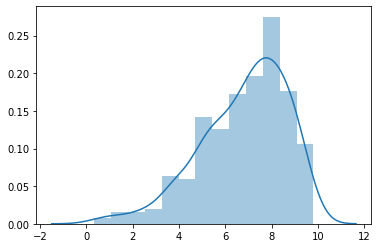

In [28]:
sns.distplot(syn_lex_p_y);

In [34]:
print('number of bad thes syn pairs: ',len(list(filter(lambda x:x<3,syn_lex_p_y))))

number of bad thes syn pairs:  14


In [31]:
dataset.tasks.keys()

dict_keys(['SIMLEX999', 'SIMVERB3000-test', 'SIMVERB500-dev'])

In [32]:
verbt_edges = set(map(frozenset,dataset.tasks['SIMVERB3000-test']['X']))

In [33]:
syn_verbt_e = verbt_edges & syn_edges

In [37]:
syn_verbt_p,syn_verbt_p_y = [],[]
for p,y in zip(dataset.tasks['SIMVERB3000-test']['X'],dataset.tasks['SIMVERB3000-test']['y']):
    if frozenset(p) in syn_verbt_e:
        syn_verbt_p.append(tuple(p))
        syn_verbt_p_y.append(y)

In [38]:
print('number of syn verbt pairs: ',len(syn_verbt_p))

number of syn verbt pairs:  1235


In [39]:
len(syn_verbt_p) / len(dataset.tasks['SIMVERB3000-test']['X'])

0.4116666666666667

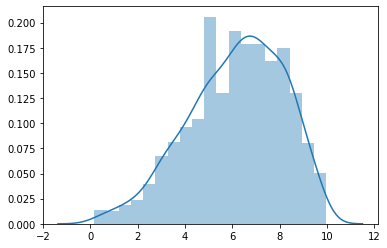

In [40]:
sns.distplot(syn_verbt_p_y);

In [13]:
dataset = Dataset()
dataset.load_task_datasets(*['adjective-pairs.val','noun-pairs.val','verb-pairs.val',
                            'adjective-pairs.test','noun-pairs.test','verb-pairs.test'])
dataset.load_words()
dataset.load_embeddings()

In [14]:
adjt_edges = set(map(frozenset,dataset.tasks['adjective-pairs.test']['X']))

In [19]:
len(adjt_edges)

1878

In [ ]:
from syn_ant_classify_task.config import ori_thesauri

In [16]:
syn_edges = set()
with open(ori_thesauri['syn_fname'], 'r') as f_syn:
    for line in f_syn:
        word_pair = line.split()
        word_pair = frozenset(word[3:] for word in word_pair)  # remove the 'en-' prefix
        syn_edges.add(word_pair)

In [17]:
print('thes syn: ',len(syn_edges))

thes syn:  52116


In [18]:
syn_adjt_e = adjt_edges & syn_edges

In [20]:
len(syn_adjt_e)

857

In [21]:
syn_adjt_p,syn_adjt_p_y = [],[]
for p,y in zip(dataset.tasks['adjective-pairs.test']['X'],dataset.tasks['adjective-pairs.test']['y']):
    if frozenset(p) in syn_adjt_e:
        syn_adjt_p.append(tuple(p))
        syn_adjt_p_y.append(y)

In [22]:
print('number of syn lex pairs: ',len(syn_adjt_p))

number of syn lex pairs:  896


In [52]:
len(syn_adjt_p) / len(dataset.tasks['adjective-pairs.test']['X'])

0.4511581067472306

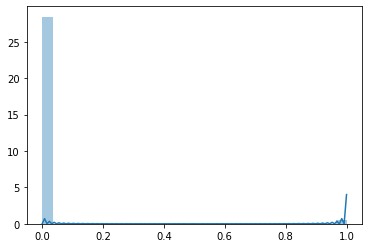

In [53]:
sns.distplot(syn_adjt_p_y);

In [23]:

ant_edges = set()
with open(ori_thesauri['ant_fname'], 'r') as f_syn:
    for line in f_syn:
        word_pair = line.split()
        word_pair = frozenset(word[3:] for word in word_pair)  # remove the 'en-' prefix
        ant_edges.add(word_pair)

In [24]:
len(ant_edges)

17153

In [28]:
ant_adjt_e = adjt_edges & ant_edges 

In [29]:
len(ant_adjt_e)

868

In [30]:

ant_adjt_p,ant_adjt_p_y = [],[]
for p,y in zip(dataset.tasks['adjective-pairs.test']['X'],dataset.tasks['adjective-pairs.test']['y']):
    if frozenset(p) in ant_adjt_e:
        ant_adjt_p.append(tuple(p))
        ant_adjt_p_y.append(y)

In [32]:
import seaborn as sns

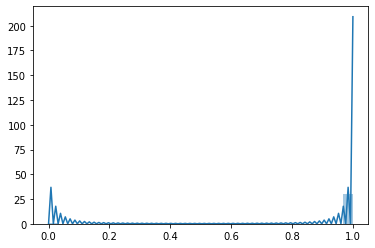

In [33]:
sns.distplot(ant_adjt_p_y)